<a href="https://colab.research.google.com/github/subiksha-sivakumar/Sparks/blob/main/CV_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **THE SPARKS FOUNDATION**
**COMPUTER VISION AND IoT**

## **SUBIKSHA SHREE S** 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
from collections import Counter
import cv2

%matplotlib inline

In [ ]:
def get_image(file_path):
    image = cv2.imread(file_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

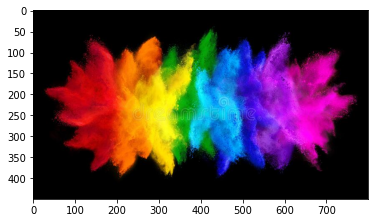

In [ ]:

image = get_image("images.jpg")
plt.imshow(image)

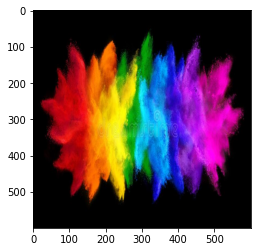

In [ ]:
image = cv2.resize(image, (600, 600))
plt.imshow(image)

In [ ]:
x = image.reshape(image.shape[0]*image.shape[1],3)
x

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [ ]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:

prominent_colors = kmeans.cluster_centers_
prominent_colors = prominent_colors.astype(int)
print(prominent_colors)

[[  3   1   2]
 [190  20 193]
 [234 106   5]
 [ 15 156 226]
 [231 210  13]
 [ 54  27 185]
 [ 27 142  23]
 [170  12  25]]


Text(0.5, 1.0, 'Prominent Colors')

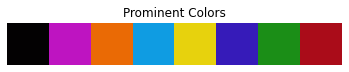

In [ ]:
plt.imshow([prominent_colors])
plt.axis('off')
plt.title("Prominent Colors")

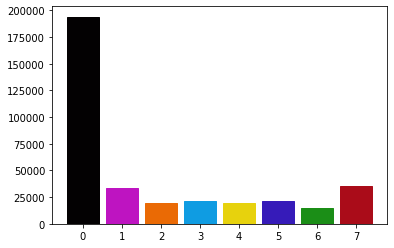

In [ ]:
intensity_list = Counter(kmeans.labels_)
keys = list(intensity_list.keys())
values = list(intensity_list.values())
# Show the prominency levels on a bar graph
bar_graph = plt.bar(keys,values)
for x in range(0, len(prominent_colors)):
  s=bar_graph[x].set_color(prominent_colors[keys[x]].astype(float)/255.0)
plt.show(bar_graph)

In [ ]:

COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 215, 0],
    'RED':[128,0,0],
    'BLACK': [0,0,0],
    'WHITE': [255,255,255],
    'MEDIUM PURPLE': [147,112,219],
    'ORANGE': [255,215,0]

}

images = []

images.append(get_image("images_4.jpg"))
images.append(get_image("images_3.jpeg"))
images.append(get_image("images_2.jpg"))

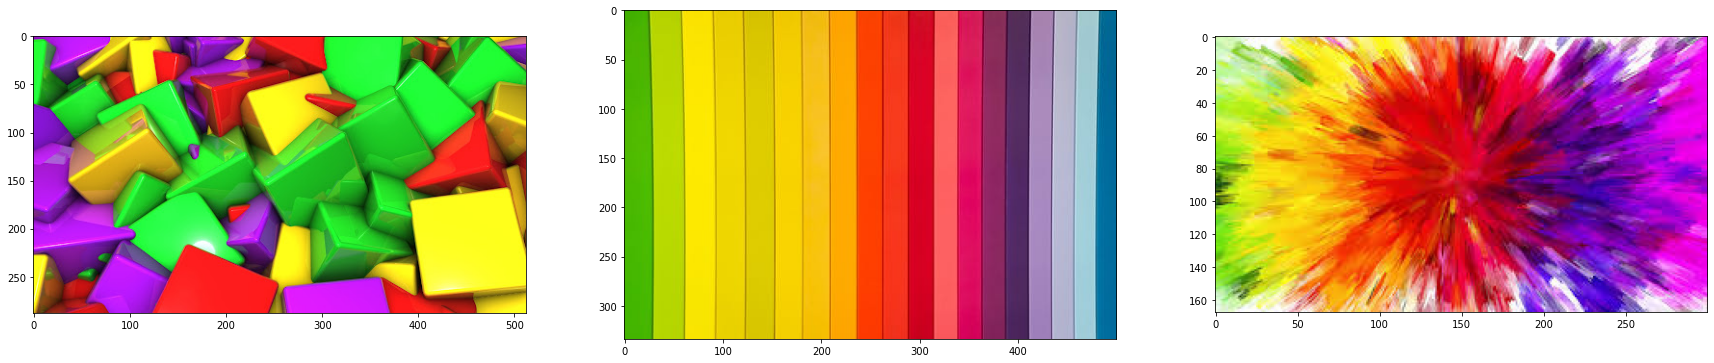

In [ ]:
plt.figure(figsize=(30, 15))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [ ]:
def get_colors(image,number_of_colors,show_chart):
  modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
  modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
  clf = KMeans(n_clusters = number_of_colors)
  labels = clf.fit_predict(modified_image)
  counts = Counter(labels)
  center_colors = clf.cluster_centers_
  ordered_colors = [center_colors[i] for i in counts.keys()]
  rgb_colors = [ordered_colors[i] for i in counts.keys()]

  return rgb_colors

In [ ]:
from skimage.color import rgb2lab, deltaE_cie76
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color,curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [ ]:

def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

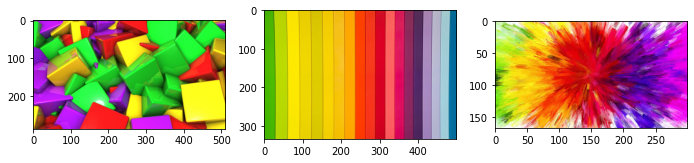

In [ ]:
selected_color=COLORS['BLUE']
threshold=60
plt.figure(figsize = (20, 10))
show_selected_images(images, selected_color, threshold, 5)

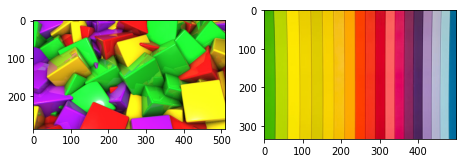

In [ ]:
selected_color=COLORS['GREEN']
threshold=60
plt.figure(figsize = (20, 10))
show_selected_images(images, selected_color, threshold, 5)